# An easy approach to ML

How would you teach an algorithm to read hand-witten characters

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

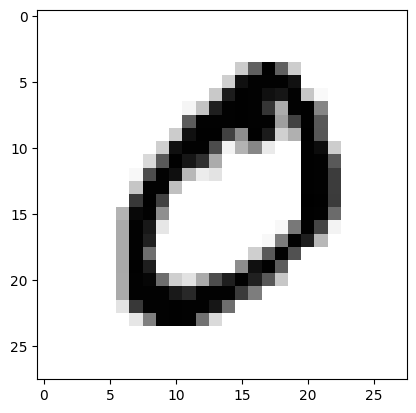

In [3]:
#Import pandas
import pandas as pd
#Import mnist dataset
from sklearn.datasets import fetch_openml

#load the mnist dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

#show an example of an element
print(mnist.data[1])

#and print as an image
import matplotlib
import matplotlib.pyplot as plt
some_digit = mnist.data[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")

## What is this number?

Ok so as we see a pc sees a hand written number as a matrix of digits, how would you write an algorithm to recognize one?



In [5]:
# Prepare the dataset for  training
X, y = mnist["data"], mnist["target"]

print('The image')
print(X[1])
print('The label')
print(y[1])


The image
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 

In [6]:
#Let's split test and train dataset using a 20%split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# And build a first feed forward network
import tensorflow as tf
from tensorflow import keras
# create a feed forward network
model = keras.models
# let's assign 4 layers (784, 16,16 10)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

# Now let's check  what is the outcome of such model


In [7]:
#checek that the input format works with one example
model.predict(X_train[1].reshape(1,784))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


array([[0.0000000e+00, 0.0000000e+00, 9.9999452e-01, 5.4316383e-06,
        1.1253061e-31, 2.0785288e-24, 1.4871478e-08, 8.3594478e-15,
        0.0000000e+00, 4.3373259e-35]], dtype=float32)

## As you see, it is not exactly doing a great job

This is because, when creating the model we all weights and biases are random

## Now let's begin the training!

In [12]:
#let's see the default loss
print(model.loss)
#and change it as a mean squared error
model.loss = tf.keras.losses.MeanSquaredError()

# Convert y_test to integers
y_test = y_test.astype(int)

#let's first check our cost function that was selected by default
model.evaluate(X_test, y_test)

sparse_categorical_crossentropy
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1323 - loss: 73.7557


[74.9224624633789, 0.13779999315738678]

# Now train the model


In [16]:
# Convert y_train to integers
y_train = y_train.astype(int)

#Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8139 - loss: 0.6433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8202 - loss: 0.6197
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8279 - loss: 0.6108
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8283 - loss: 0.5941
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8364 - loss: 0.5728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8344 - loss: 0.5615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8429 - loss: 0.5489
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8439 - loss: 0.5367
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8510 - loss: 0.5186
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8598 - loss: 0.4911


## Explanation of Model Training

You just trained the neural network using the `model.fit()` function. Here's what happened:

*   **Epochs:** You specified `epochs=5`, meaning the model went through the entire training dataset 5 times.
*   **Batch Size:** You used a `batch_size=32`, which means the model updated its weights after processing every 32 examples from the training data.
*   **Loss (sparse_categorical_crossentropy):** This number indicates how well the model is performing. A lower loss means the model's predictions are closer to the true labels. You can see the loss decreasing with each epoch, which is a good sign that the model is learning.
*   **Accuracy:** This metric shows the percentage of correctly classified handwritten digits in the training set for each epoch. As you can see, the accuracy increased significantly from the first to the last epoch, indicating that the model is getting better at recognizing the digits.

The training process adjusted the model's internal parameters (weights and biases) to minimize the loss and maximize the accuracy on the training data. The goal is for the model to learn patterns in the handwritten digits that allow it to correctly classify new, unseen digits.

In [17]:
#Now let's evaluate on the  test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.5598


[0.4995267987251282, 0.8644000291824341]

###Note that the accuracy is different from the loss, why?


In [18]:
#Lets' now predict our first digit
model.predict(X_train[1].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[9.9859029e-01, 9.9195540e-07, 1.8538887e-04, 1.2285775e-04,
        1.3155952e-07, 9.1034814e-04, 1.4422135e-04, 3.8196872e-06,
        3.8725211e-05, 3.1794534e-06]], dtype=float32)